* Keypoints are discovered by decomposing images into multiple scales
* The larger the circle, the larger the scale at which the keypoint was detected
* **Orientation** of the keypoints are used to match patterns across images
* Each keypoint has its descriptor which describes the keypoints, i.e. holds info about the keypoint's scale and orientation

In [1]:
# SIFT implementation is in this version of the opencv library 
! pip install opencv-contrib-python==3.4.2.16

In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt

from skimage.transform import resize

In [2]:
img = cv2.imread("images/irish_passport.jpg")

In [53]:
img.shape

(806, 1200, 3)

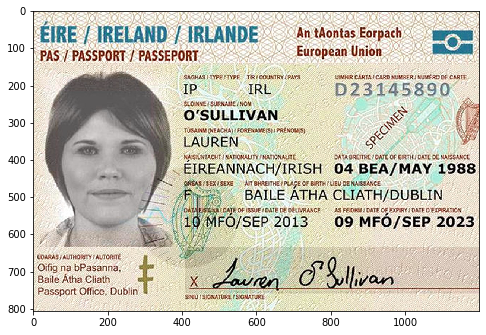

In [54]:
plt.figure(figsize=(8,8))
plt.imshow(img)

In [3]:
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
sift = cv2.xfeatures2d.SIFT_create()

In [28]:
sift

<xfeatures2d_SIFT 0x7fd05324b9b0>

In [5]:
# detect() function finds the keypoints in the image, can specify a mask to focus on a section of the image
kp1 = sift.detect(gray1, None) # None = no mask


In [30]:
kp1

[<KeyPoint 0x7fd098da57b0>,
 <KeyPoint 0x7fd098da5ab0>,
 <KeyPoint 0x7fd098da57e0>,
 <KeyPoint 0x7fd052f55d20>,
 <KeyPoint 0x7fd052f557b0>,
 <KeyPoint 0x7fd052f55cf0>,
 <KeyPoint 0x7fd052f55b40>,
 <KeyPoint 0x7fd052f55ba0>,
 <KeyPoint 0x7fd052f55e10>,
 <KeyPoint 0x7fd052f55de0>,
 <KeyPoint 0x7fd052f55cc0>,
 <KeyPoint 0x7fd052f55e40>,
 <KeyPoint 0x7fd052f55ea0>,
 <KeyPoint 0x7fd052f55e70>,
 <KeyPoint 0x7fd052f55d50>,
 <KeyPoint 0x7fd052f55db0>,
 <KeyPoint 0x7fd052f55f00>,
 <KeyPoint 0x7fd052f55ed0>,
 <KeyPoint 0x7fd052f55fc0>,
 <KeyPoint 0x7fd052f55f60>,
 <KeyPoint 0x7fd052f55f90>,
 <KeyPoint 0x7fd052f55f30>,
 <KeyPoint 0x7fd0542a1030>,
 <KeyPoint 0x7fd0542a1060>,
 <KeyPoint 0x7fd0542a1090>,
 <KeyPoint 0x7fd0542a10c0>,
 <KeyPoint 0x7fd0542a10f0>,
 <KeyPoint 0x7fd0542a1120>,
 <KeyPoint 0x7fd0542a1150>,
 <KeyPoint 0x7fd0542a1180>,
 <KeyPoint 0x7fd0542a11b0>,
 <KeyPoint 0x7fd0542a11e0>,
 <KeyPoint 0x7fd0542a1210>,
 <KeyPoint 0x7fd0542a1240>,
 <KeyPoint 0x7fd0542a1270>,
 <KeyPoint 0x7fd0542

### draw the keypoints over the original image

In [58]:
img1 = cv2.drawKeypoints(gray1,kp1,outImage=None,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # for each key point in the image, the circle around the keypoint represents the size and orientation

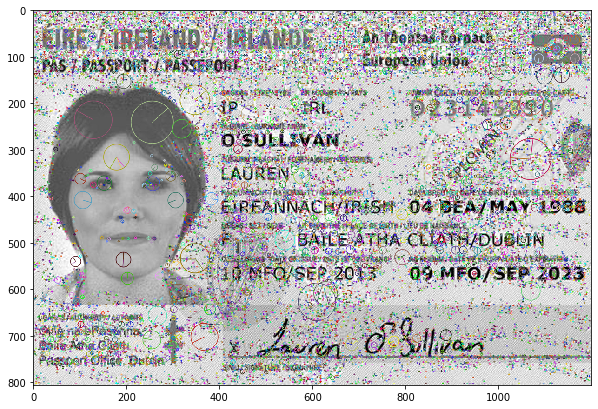

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(img1,cmap='gray')

### Compute descriptors for keypoints

In [6]:
kp1,des1=sift.compute(gray1,kp1)

In [19]:
des1.shape

(17289, 128)

### Use keypoints and descriptors to find matching features between 2 images

In [7]:
img2 = cv2.imread('images/irish_passport_2.jpg')

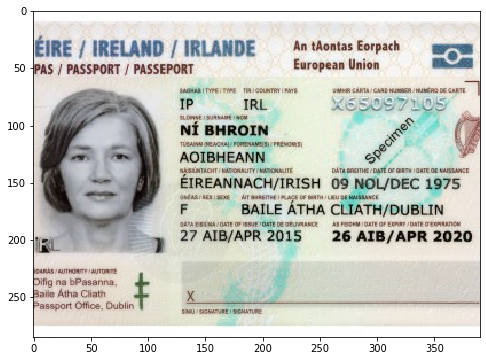

In [62]:
plt.figure(figsize=(8,8))
plt.imshow(img2)

In [8]:
# convert to grayscale
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [9]:
kp2,des2=sift.detectAndCompute(gray2, None) # mask = None

## match features across different images

In [10]:
# brute-force descriptor match. For each descriptor in the first set, 
# find the closest descriptor in the second by trying each one
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches = bf.match(des1, des2)

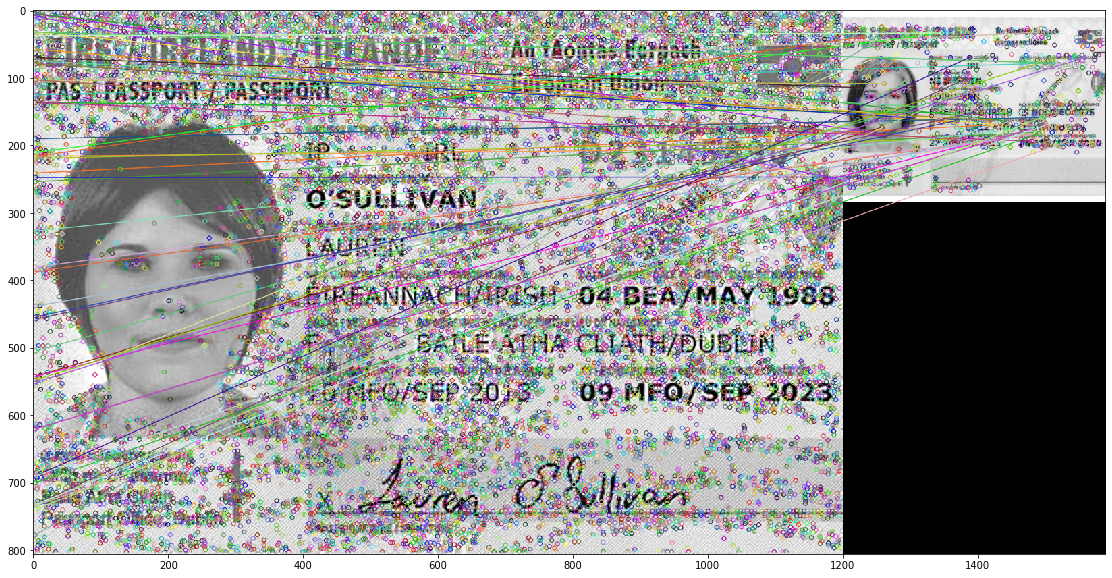

In [11]:
# visualise the first 50 matches

n_matches = 50

match_img = cv2.drawMatches(
    gray1, kp1,
    gray2, kp2,
    matches[:n_matches],gray2.copy(),flags=0
)

plt.figure(figsize=(20,10))
plt.imshow(match_img)